<a href="https://colab.research.google.com/github/sonudhakane7526/CodeClauseInternship_DataScience_Internship_Projects/blob/main/Task_3)_Customer_Segmentation_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project ID - **#CC69861**

Project Title - **Customer Segmentation Tool**

Internship Domain - **Data Science Intern**

Project Level - **Golden Level**

Assigned By - **CodeClause Internship**

Assigned To - **Vikas Atmaram Dhakane**

Aim -
**Develop a UI for users to input customer data. Use clustering algorithms to segment customers based on behavior.**

# **1. Importing Required Libraries**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# **2. Data Collection and Analysis**

In [6]:
customer_dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
customer_dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_dataset.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
# shape of dataset
customer_dataset.shape

(200, 5)

In [6]:
# information about dataset
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [27]:
# Drop irrelevant columns (if any)
customer_dataset = customer_dataset.drop(columns=['CustomerID'])

In [28]:
# Handle missing values (if any)
customer_dataset = customer_dataset.dropna()

In [7]:
# datatypes of columns dataset
customer_dataset.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
# statistical measures of dataset
customer_dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **3. Data Visulalization**

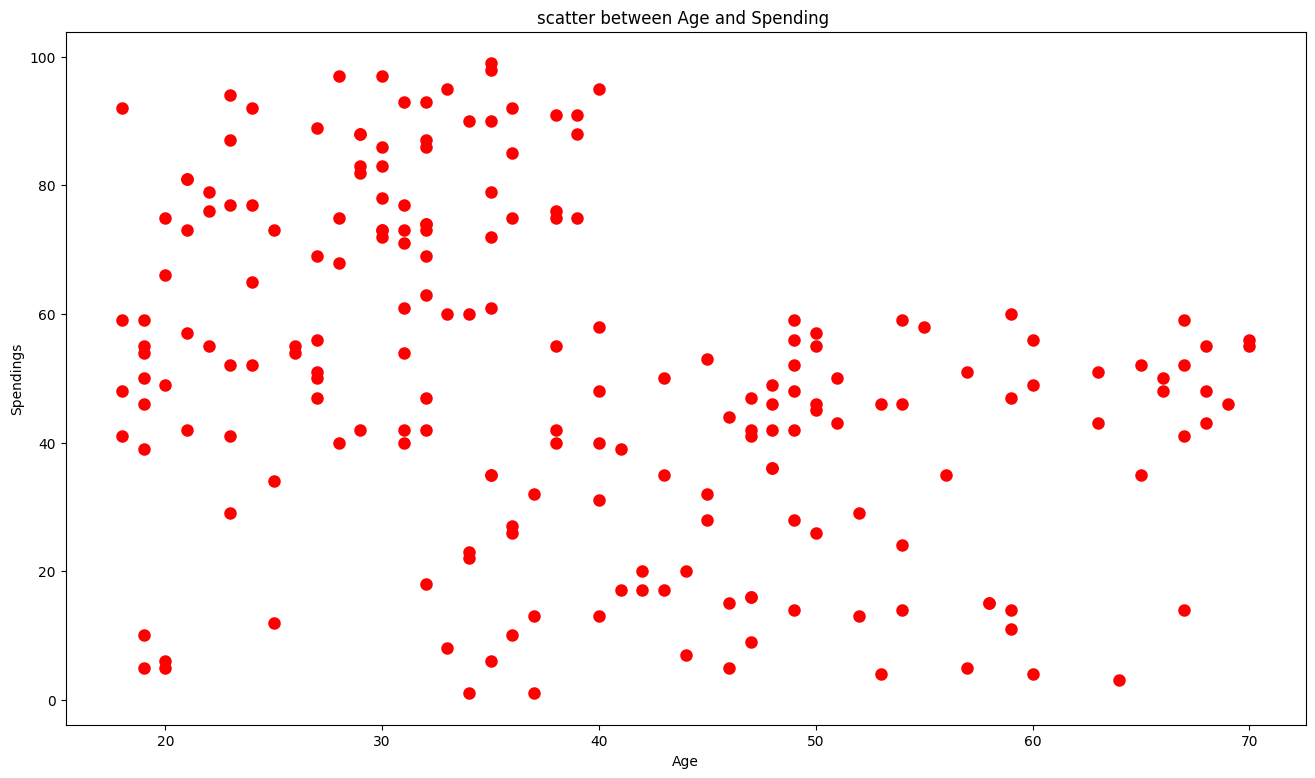

In [15]:
plt.figure(figsize = (16,9))
plt.scatter(x = customer_dataset.Age, y = customer_dataset['Spending Score (1-100)'], c = "red", linewidth = 3)
plt.title('scatter between Age and Spending ')
plt.ylabel("Spendings")
plt.xlabel("Age")
plt.show()

<Axes: xlabel='Age', ylabel='count'>

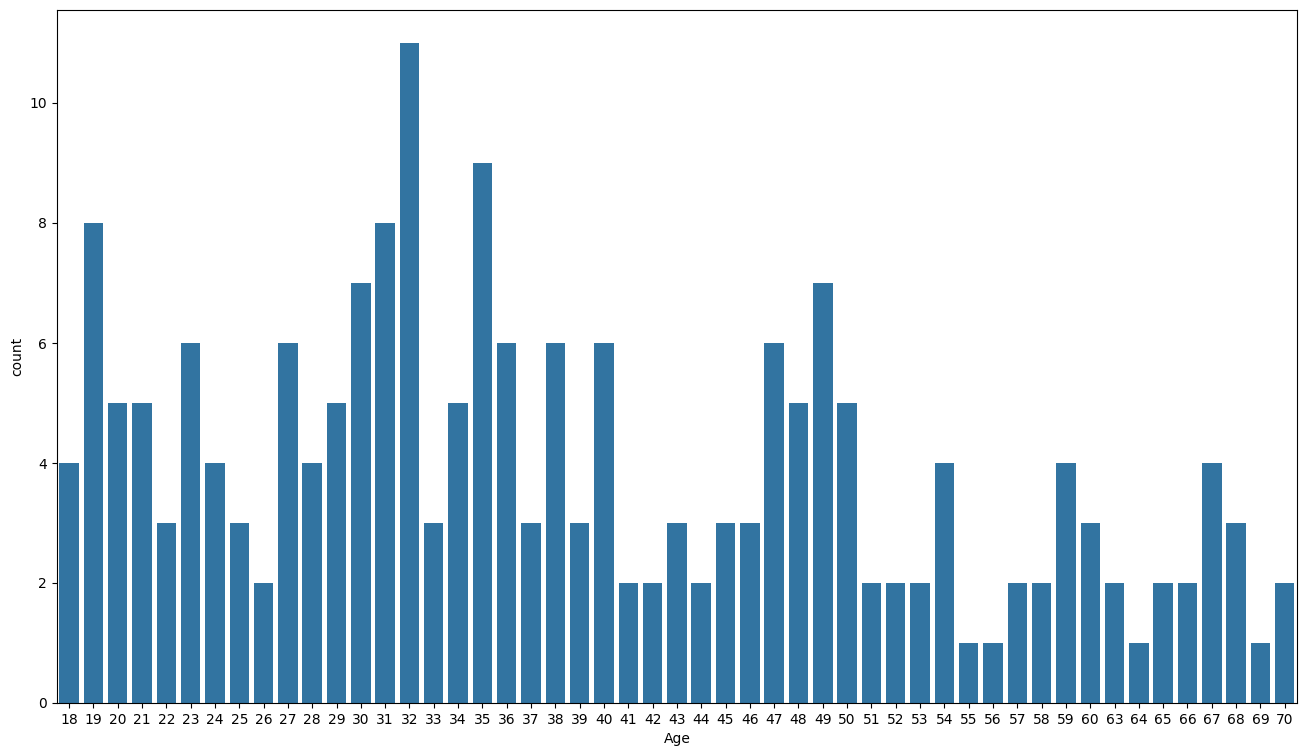

In [33]:
# range of age
plt.figure(figsize = (16,9))
sns.countplot(x = customer_dataset.Age)

<Axes: xlabel='Annual Income (k$)', ylabel='count'>

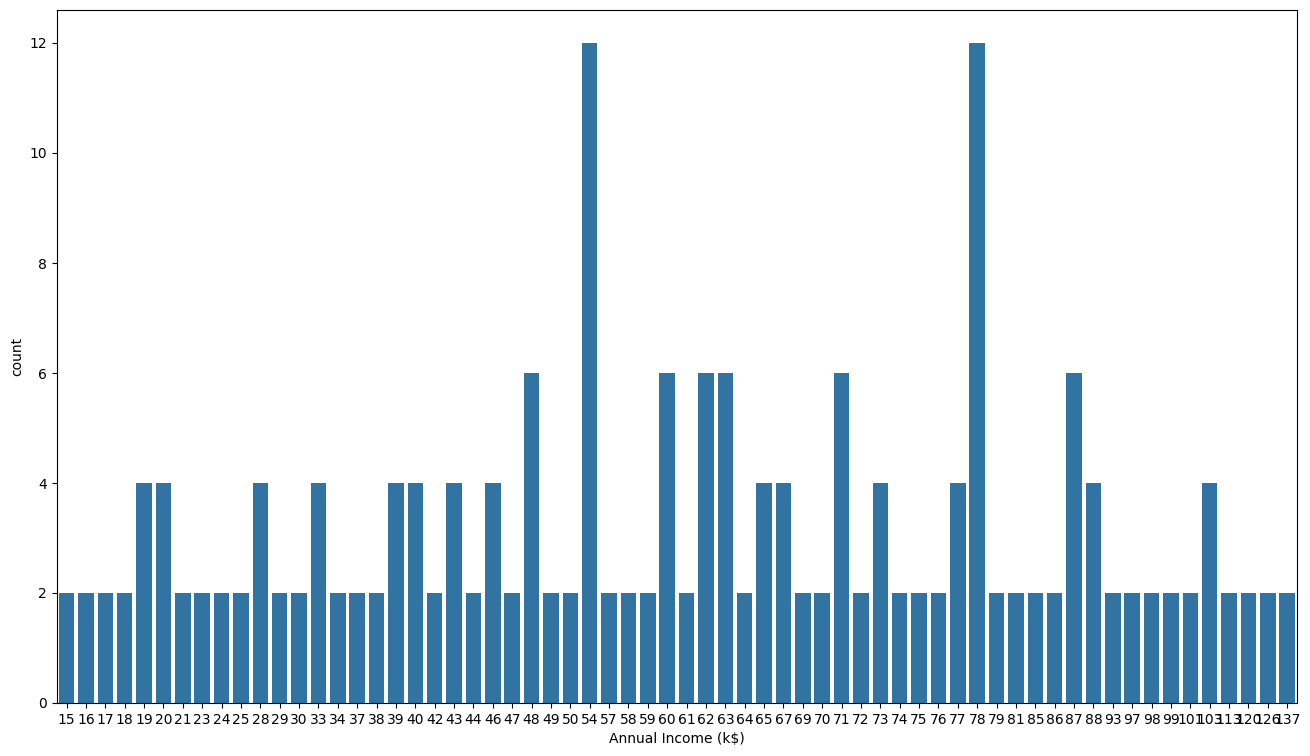

In [26]:
# range of income
plt.figure(figsize = (16,9))
sns.countplot(x = customer_dataset['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='count'>

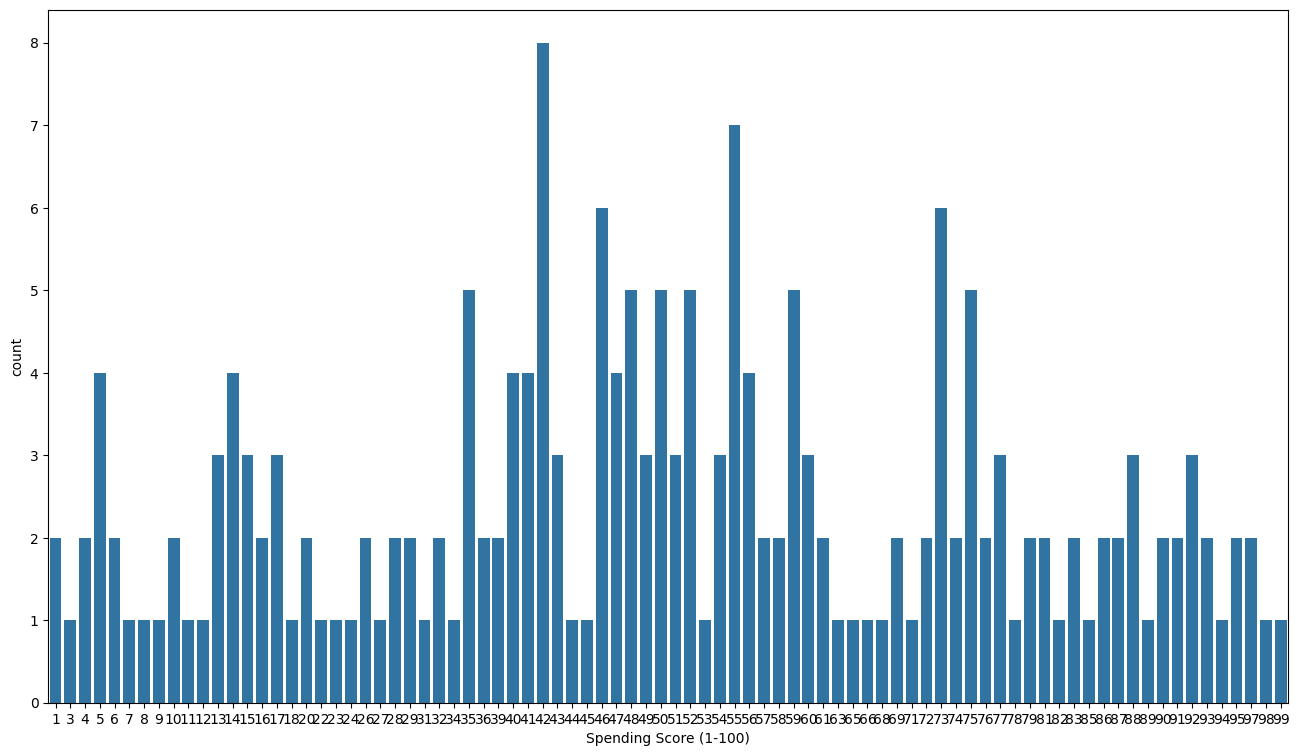

In [27]:
# range of spending score
plt.figure(figsize = (16,9))
sns.countplot(x = customer_dataset['Spending Score (1-100)'])

<Axes: xlabel='Genre', ylabel='count'>

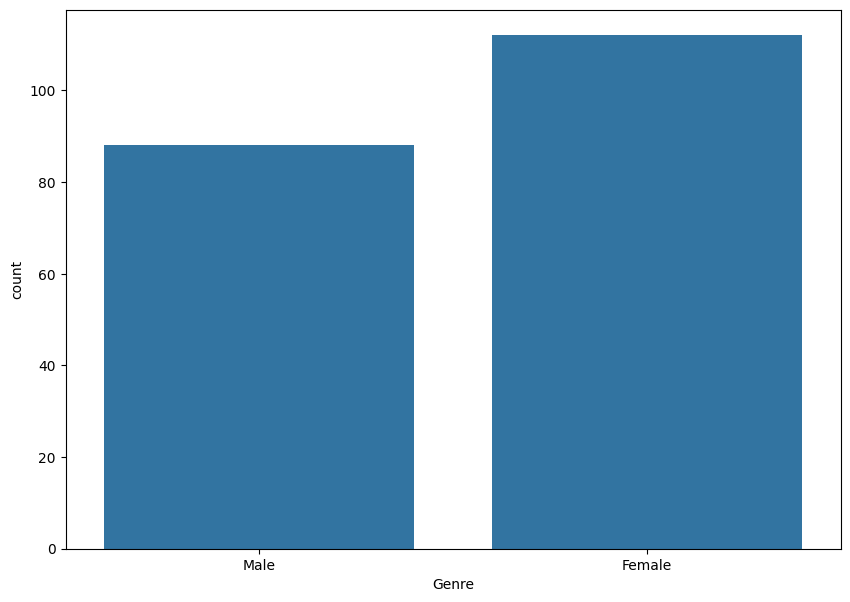

In [13]:
# plotting the graph of genre
plt.figure(figsize = (10,7))
sns.countplot(x = customer_dataset['Genre'])

# **3. Choosing the Annual Income Column and Spending Columns**

In [14]:
customer_dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
customer_dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [31]:
# Normalize the data
scaler = StandardScaler()
customer_dataset_scaled = scaler.fit_transform(customer_dataset.iloc[:, 1:])

# Convert the scaled data back to a customer dataset
customer_dataset_scaled = pd.DataFrame(customer_dataset_scaled, columns=customer_dataset.columns[1:])

In [16]:
# using iloc for picking 3rd and 4th columns
X = customer_dataset.iloc[:,[3,4]].values

In [17]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# **4. Choosing the Number of Clusters by applying Clustering Algorithm**

In [18]:
# finding WCSS values for different number of clusters

wcss = []  # Within the Cluster Sum of Squares

for i in range(1,11):
    # 1 and 11 will be excluded
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

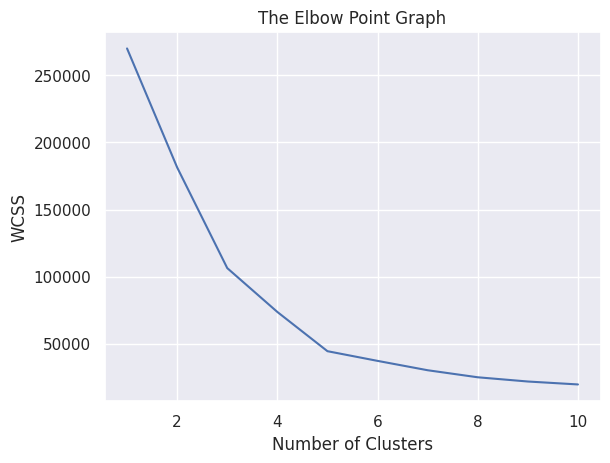

In [19]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [32]:
# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
customer_dataset['Cluster'] = kmeans.fit_predict(customer_dataset_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# Inspect the resulting clusters
print(customer_dataset.head())

    Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        2
1    Male   21                  15                      81        2
2  Female   20                  16                       6        3
3  Female   23                  16                      77        2
4  Female   31                  17                      40        2


Here, Optimum number of clusters = **5**

# **5. Training the K-Means Clustering model**

In [21]:
# return a label for each data point based on their clusters

kmeans = KMeans(n_clusters =5, init = 'k-means++', random_state =0)

In [22]:
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **6. Plotting data in graph**

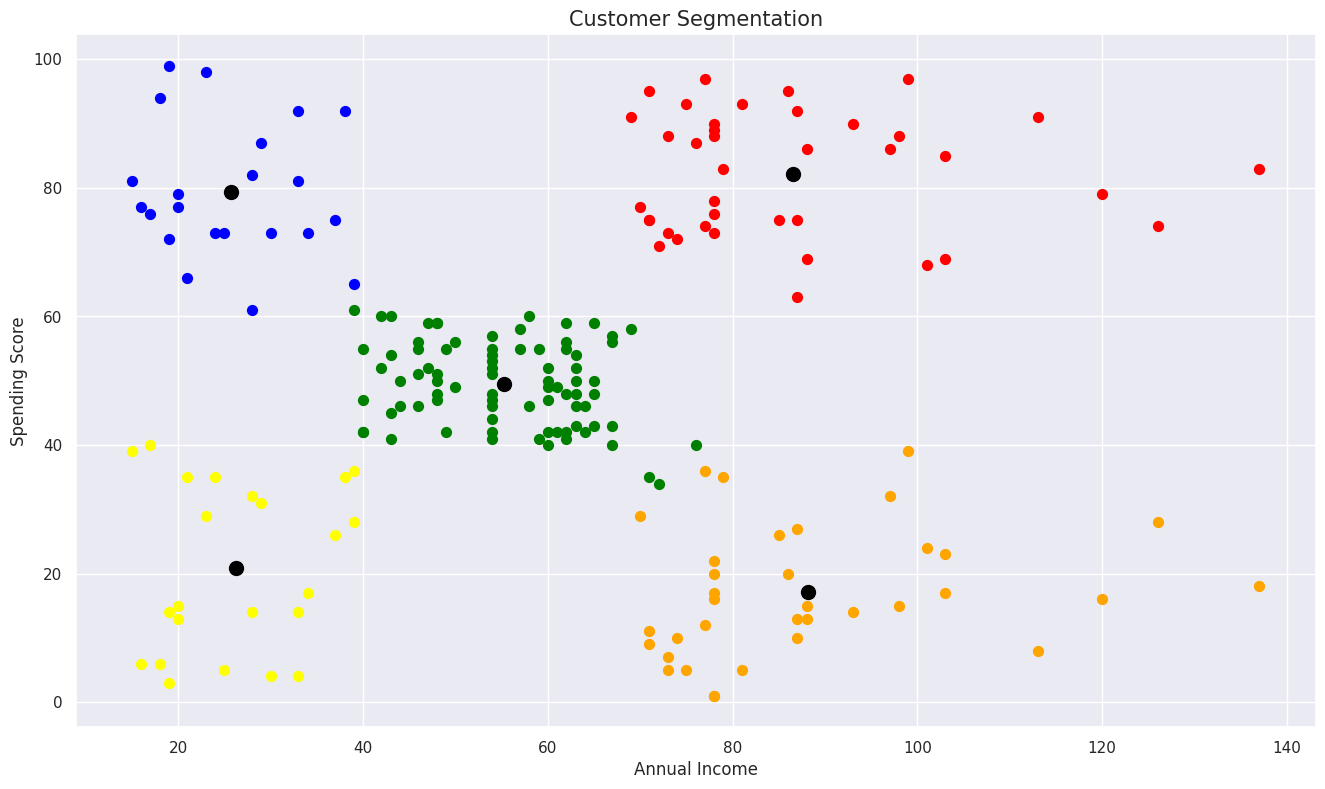

In [23]:
# plotting all the clusters and their centroids

plt.figure(figsize = (16,9))
plt.title("Customer Segmentation", fontsize = 15)
plt.scatter(X[Y==0,0], X[Y==0,1], s= 50, c = 'orange', label = 'Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s= 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[Y==2,0], X[Y==2,1], s= 50, c = 'red', label = 'Cluster 2')
plt.scatter(X[Y==3,0], X[Y==3,1], s= 50, c = 'blue', label = 'Cluster 3')
plt.scatter(X[Y==4,0], X[Y==4,1], s= 50, c = 'yellow', label = 'Cluster 4')

# plot the centroids
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s =100, c='black', label = 'Centroids')

# **7. Developing a User Interface**

In [52]:
pip install Flask

In [53]:
# Importing required libraries

from flask import Flask, request, render_template
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [54]:
app = Flask('VIKAS UI for Customer Segmentation Tool')

In [55]:
# Loading and preprocessing the dataset

customer_dataset = pd.read_csv('Mall_Customers.csv')
customer_dataset = customer_dataset.drop(columns = ['CustomerID'])
scaler = StandardScaler()
customer_dataset_scaled_scaled = scaler.fit_transform(customer_dataset.iloc[:, 1:])
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
customer_dataset['Cluster'] = kmeans.fit_predict(customer_dataset_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
@app.route('/')
def index():
    return render_template('index.html')

In [57]:
@app.route('/segment', methods=['POST'])
def segment():
    data = [request.form.get('age'), request.form.get('income'), request.form.get('spending_score')]
    data = scaler.transform([data])
    cluster = kmeans.predict(data)[0]
    return render_template('result.html', cluster=cluster)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app 'VIKAS UI for Customer Segmentation Tool'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


# **THANK YOU!**